In [19]:
from sklearn.datasets import load_boston
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [20]:
data = load_boston()
X, y = data['data'], data['target']
X_rm = X[:, 5]

In [21]:
def draw_rm_and_price():
    plt.scatter(X[:, 5], y)

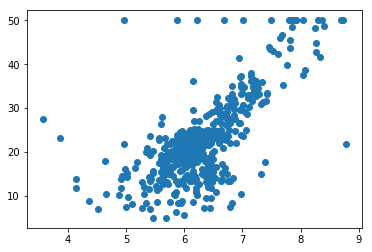

In [22]:
draw_rm_and_price()

### loss

$$ loss = \frac{1}{n} \sum|(y_i - (kx_i + b_i))| $$

 $$ \frac{\partial{loss}}{\partial{k}} = -\frac{1}{n}\sum x_isign(y_i - (kx_i + b_i))$$

 $$ \frac{\partial{loss}}{\partial{k}} = -\frac{1}{n}\sum x_isign(y_i - \hat{y_i})$$

 $$ \frac{\partial{loss}}{\partial{b}} = -\frac{1}{n}\sum sign(y_i - \hat{y_i})$$

In [23]:
def loss(y, y_hat): # to evaluate the performance 
    return sum(abs(y_i - y_hat_i) for y_i, y_hat_i in zip(list(y), list(y_hat))) / len(list(y))

In [24]:
def partial_k(x,y,y_hat):
    n = len(y)
    return -1/n*sum(np.sign(y_i-y_hat_i)*x_i for x_i, y_i, y_hat_i in zip(list(x),list(y),list(y_hat)))

In [25]:
def partial_b(x,y,y_hat):
    n = len(y)
    return -1/n*sum(np.sign(y_i-y_hat_i) for x_i, y_i, y_hat_i in zip(list(x),list(y),list(y_hat)))

In [26]:
import random

In [27]:
def price(rm, k, b):
    """f(x) = k * x + b"""
    return k * rm + b  

In [33]:

trying_times = 2000

min_loss = float('inf')

current_k = random.random() * 200 - 100   
current_b = random.random() * 200 - 100      #初始化问题

X, y = data['data'], data['target']


learning_rate = 1e-01                        #optimizer



for i in range(trying_times):
    
    price_by_k_and_b = [price(r, current_k, current_b) for r in X_rm]            #price 函数定义问题：减少过拟合，regulazation
    current_loss = loss(y, price_by_k_and_b)                                     #loss定义问题
    if current_loss < min_loss:
        
        min_loss = current_loss
        if i % 500 == 0: 
            print('When time is : {}, get best_k: {} best_b: {}, and the loss is: {}'.format(i, current_k, current_b, min_loss))
    
    k_gradient = partial_k(X_rm, y , price_by_k_and_b)                          #pytorch 快速求导
    b_gradient = partial_b(X_rm, y, price_by_k_and_b)
    
    current_k = current_k+(-k_gradient)*learning_rate
    current_b = current_b+(-b_gradient)*learning_rate
    


When time is : 0, get best_k: -19.57332445821733 best_b: -62.20065464008051, and the loss is: 207.74464892909737
When time is : 500, get best_k: 12.501487004233404 best_b: -55.89709732782721, and the loss is: 4.654411686170187
When time is : 1000, get best_k: 12.302365265102775 best_b: -54.70855977842003, and the loss is: 4.625226161892499
When time is : 1500, get best_k: 12.127068031901143 best_b: -53.610931319922024, and the loss is: 4.600523632043046


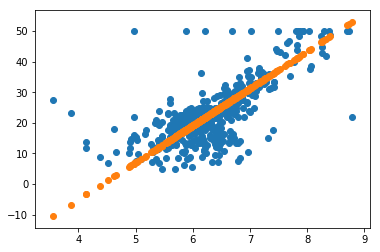

In [34]:
k = 12.127068031901143 
b = -53.610931319922024
price_by_gradient = [price(ii,k,b) for ii in X_rm]
draw_rm_and_price()
plt.scatter(X_rm,price_by_gradient)
